In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math


verbose_print = True

def log(*args, **kwargs):
    if verbose_print:
        print("LOG:", *args, **kwargs)

np.random.seed(42)
pd.set_option('display.max_columns', None)

In [3]:
def load_csv(path):
    full = os.path.join('diabetes', path)
    return pd.read_csv(full)

original = load_csv('diabetic_data_balanced.csv')
df = original.copy()
df, labels = df.drop('readmitted', axis=1), df['readmitted']

In [4]:
original

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,94332918,94297905,Caucasian,Female,[50-60),NaN,2,1,1,3,MD,NaN,49,0,21,0,0,1,599,496,250,6,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,<30
9995,94354164,7154802,AfricanAmerican,Male,[50-60),NaN,2,1,1,1,WC,Cardiology,43,2,7,0,0,0,427,426,726,5,None,None,Up,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Ch,Yes,<30
9996,94367076,67099194,Caucasian,Male,[70-80),[50-75),1,3,5,4,MC,NaN,64,0,7,0,0,0,250.8,396,397,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,<30
9997,94444062,60479757,Caucasian,Male,[60-70),NaN,6,1,17,1,NaN,Family/GeneralPractice,72,0,14,0,0,0,599,496,41,8,None,None,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,<30


In [5]:
def transf_age_inplace(df):
    num_ages = np.linspace(5, 95, 10)
    cat_ages = df['age'].unique()

    for cat, num in zip(cat_ages, num_ages):
        log("Replacing", cat, "with", num)
        df['age'].replace(to_replace=cat, value=num, inplace=True)

In [6]:
groups = np.unique(labels)
groups_nono = ['<30', '>30']

In [7]:
def plot_against(col1, col2, groups):
    v_col1 = df[col1].values
    v_col2 = df[col2].values
    
    for g in groups:
        idx = np.where(labels == g)
        plt.scatter(v_col1[idx], v_col2[idx], label=g, alpha=0.5)
        plt.xlabel(col1)
        plt.ylabel(col2)
        plt.legend()
        plt.plot()

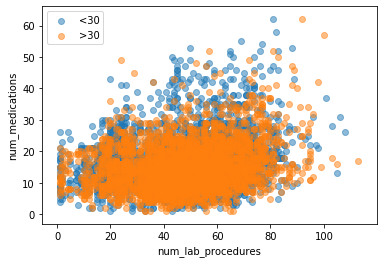

In [8]:
plot_against('num_lab_procedures', 'num_medications', groups_nono)

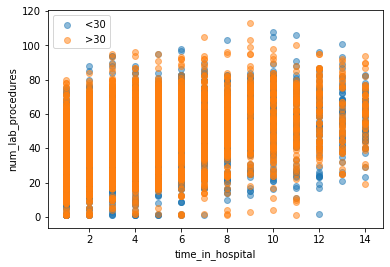

In [9]:
plot_against('time_in_hospital', 'num_lab_procedures', groups_nono)

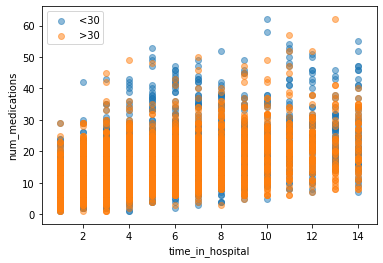

In [10]:
plot_against('time_in_hospital', 'num_medications', groups_nono)

LOG: Replacing [0-10) with 5.0
LOG: Replacing [10-20) with 15.0
LOG: Replacing [20-30) with 25.0
LOG: Replacing [30-40) with 35.0
LOG: Replacing [40-50) with 45.0
LOG: Replacing [50-60) with 55.0
LOG: Replacing [60-70) with 65.0
LOG: Replacing [70-80) with 75.0
LOG: Replacing [80-90) with 85.0
LOG: Replacing [90-100) with 95.0


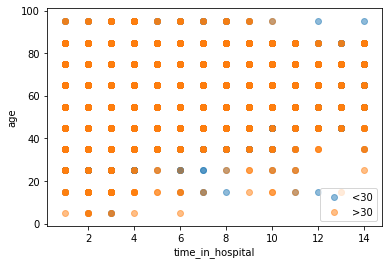

In [11]:
transf_age_inplace(df)
plot_against('time_in_hospital', 'age', groups_nono)

In [12]:
original.corr()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
encounter_id,1.000000,0.048730,-0.126505,-0.026210,0.068865,0.058639,-0.069468,-0.050978,0.082238,0.145047,0.121776,0.260721,0.092946
patient_nbr,0.048730,1.000000,0.209586,-0.176317,0.149614,0.022666,0.081258,-0.009121,0.092320,0.121212,0.065750,0.037355,0.000866
admission_type_id,-0.126505,0.209586,1.000000,0.353559,0.233579,-0.038970,-0.139136,0.030556,0.072788,0.042079,0.068900,-0.078296,-0.126956
discharge_disposition_id,-0.026210,-0.176317,0.353559,1.000000,-0.072128,0.073574,-0.009669,0.019063,0.038705,-0.016782,-0.019309,-0.026635,0.024436
admission_source_id,0.068865,0.149614,0.233579,-0.072128,1.000000,-0.040664,-0.121644,-0.162080,-0.010817,0.114271,0.174665,0.024487,0.081335
time_in_hospital,0.058639,0.022666,-0.038970,0.073574,-0.040664,1.000000,0.344644,0.252583,0.494652,-0.022858,-0.031959,0.056029,0.279064
num_lab_procedures,-0.069468,0.081258,-0.139136,-0.009669,-0.121644,0.344644,1.000000,0.114234,0.248293,-0.054956,-0.087302,-0.001849,0.204457
num_procedures,-0.050978,-0.009121,0.030556,0.019063,-0.162080,0.252583,0.114234,1.000000,0.455184,-0.026257,-0.052885,-0.084825,0.119608
num_medications,0.082238,0.092320,0.072788,0.038705,-0.010817,0.494652,0.248293,0.455184,1.000000,0.035619,-0.003663,0.035823,0.275889
number_outpatient,0.145047,0.121212,0.042079,-0.016782,0.114271,-0.022858,-0.054956,-0.026257,0.035619,1.000000,0.190584,0.124921,0.054604


In [13]:
plt.subplots((1, 3))

TypeError: 'tuple' object cannot be interpreted as an integer

<Figure size 432x288 with 0 Axes>

In [ ]:
int(math.ceil(math.sqrt(10)))

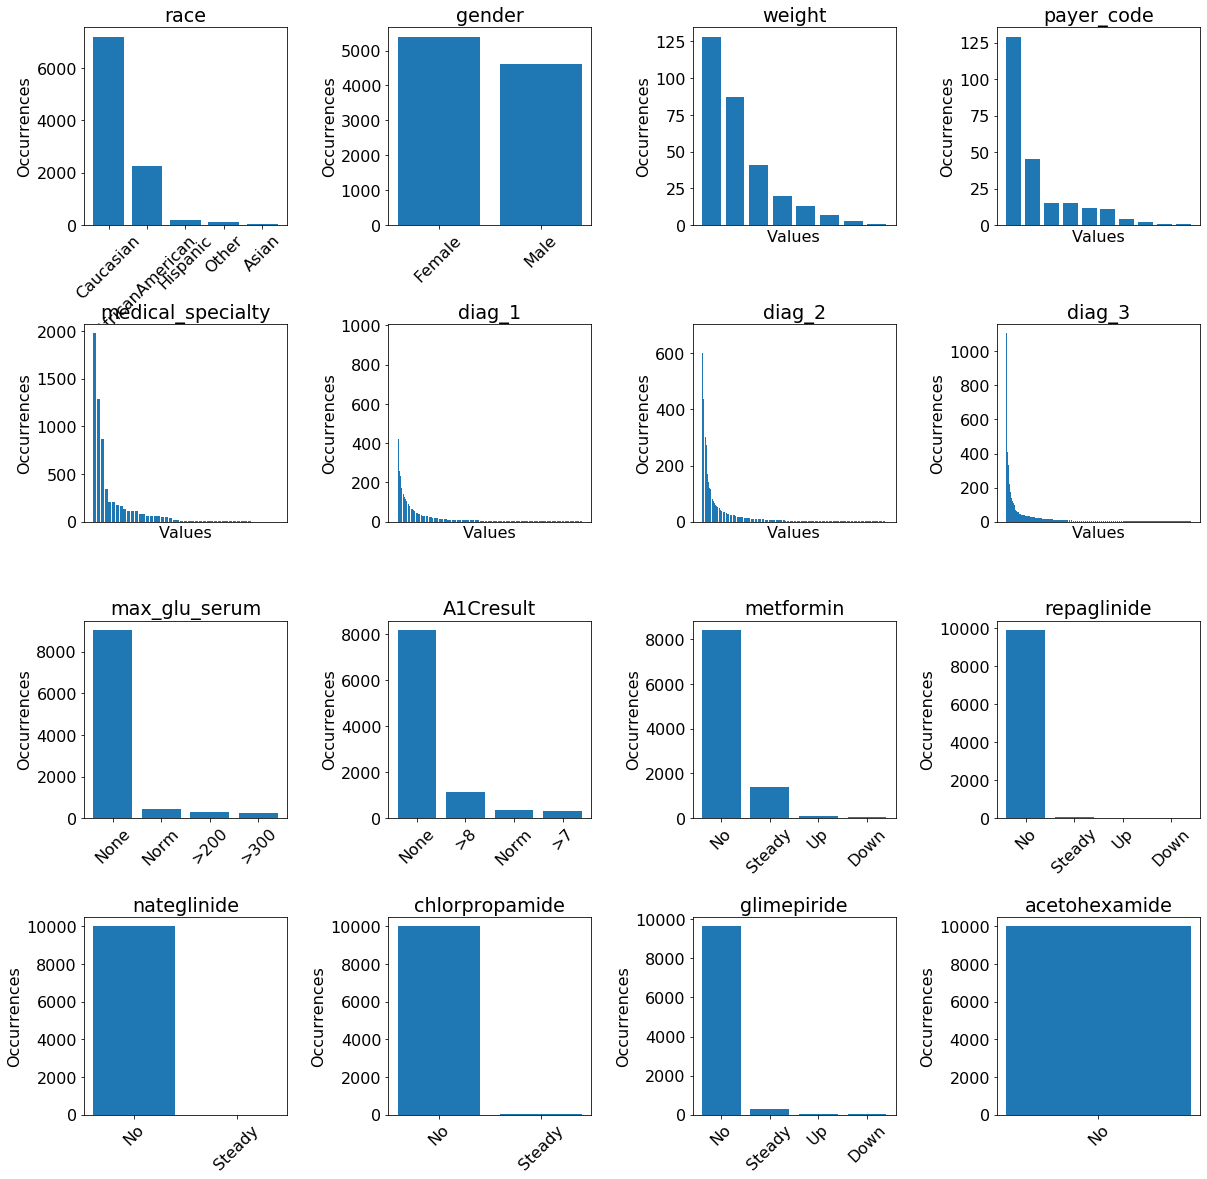

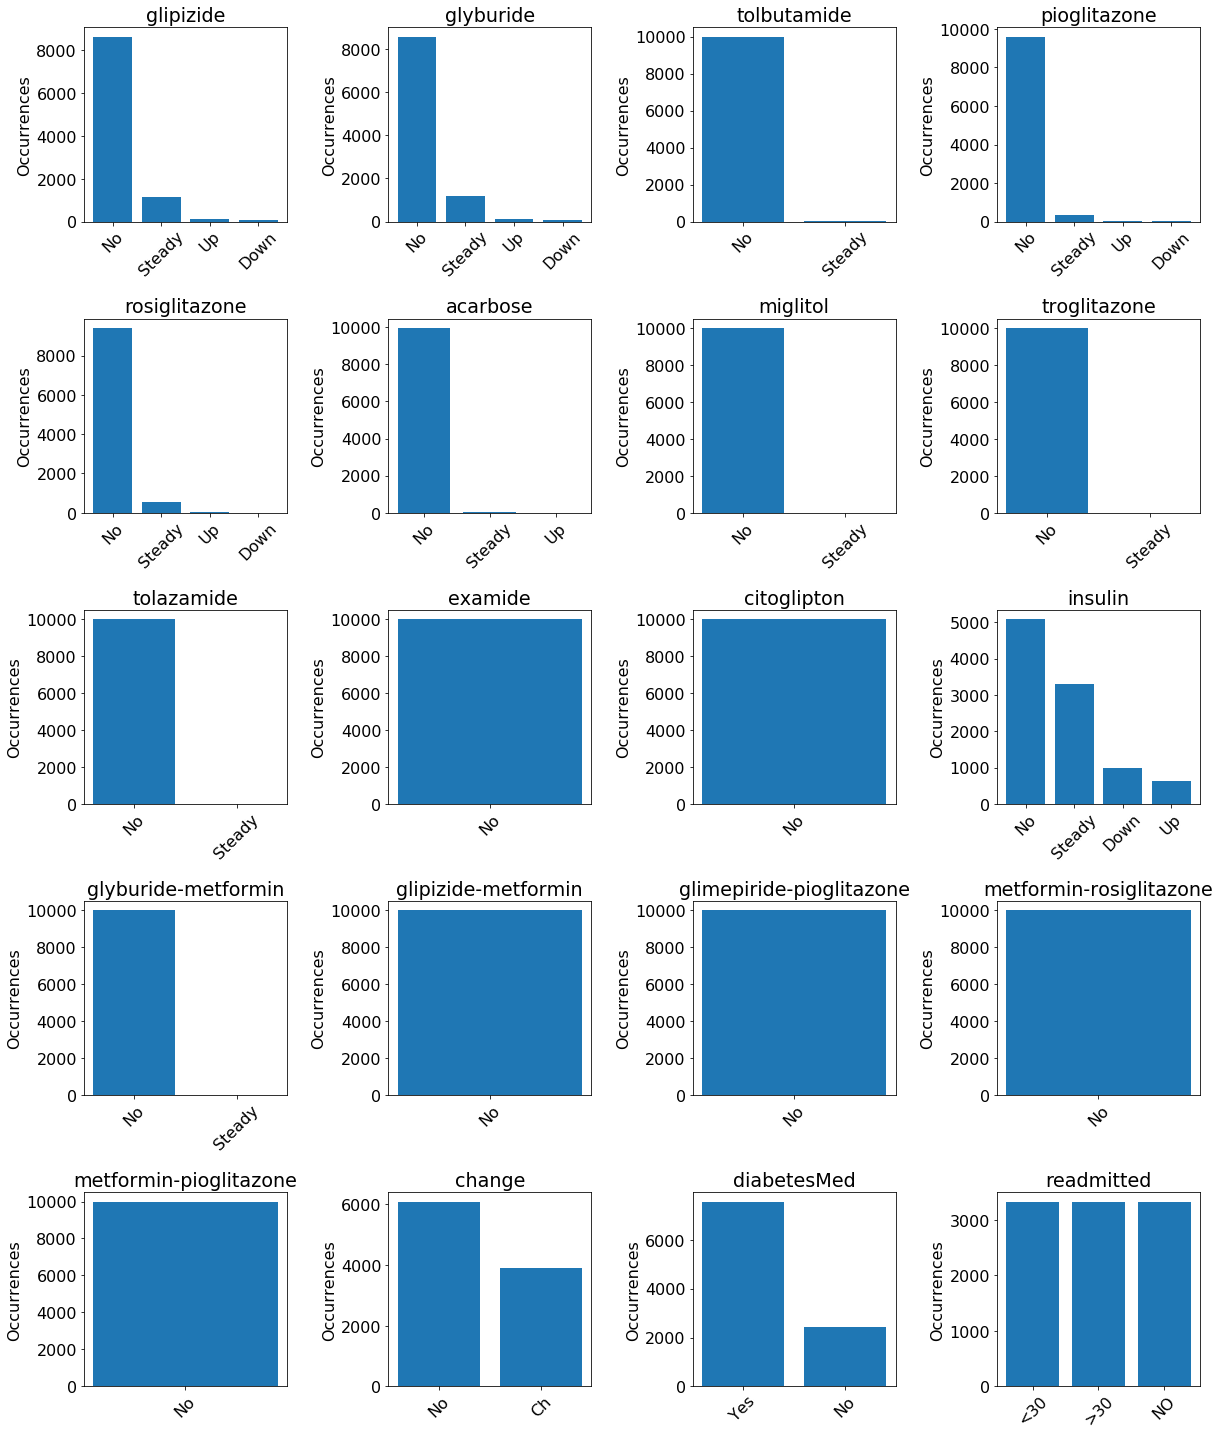

In [65]:
def get_cat_cols(df):
    return df.select_dtypes(include='object').columns

def plot_df(df, suptitle):
    cols = df.columns
    
    nrows = int(math.ceil(math.sqrt(len(cols))))
    ncols = math.ceil(len(cols) / nrows)
    
    fig, ax = plt.subplots(figsize=(5*ncols,5*nrows), nrows=nrows, ncols=ncols)
#     fig.suptitle(suptitle, fontsize=16)
    which = 0
    
    for axrow in ax:
        for axcol in axrow:
            if which >= len(cols):
                break
            
            col = cols[which]
            
            both = df[col].value_counts()
            index, vals = both.index, both.values

            axcol.set_title(f"{col}")
            
            if len(vals) > 5:
                axcol.set_xticks([])
                axcol.set_xlabel(f"Values")
            
            axcol.set_ylabel("Occurrences")
            axcol.tick_params(axis='x', rotation=45)
            axcol.bar(index, vals)
            
            which += 1

    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    return fig

import matplotlib
matplotlib.rcParams.update({'font.size': 16})

play = original.copy()

# play.drop(['encounter_id', 'patient_nbr'], axis=1, inplace=True)
cats = list(get_cat_cols(play))
cats.remove("age")

# cats = cats[:12]

mid = len(cats) // 2 - 2
cats1 = cats[:mid]
cats2 = cats[mid:]

plot_df(play[cats1], 'Distributions of categorical features').savefig("cat-distr1.png")
plot_df(play[cats2], 'Distributions of categorical features').savefig("cat-distr2.png")

LOG: Replacing [0-10) with 5.0
LOG: Replacing [10-20) with 15.0
LOG: Replacing [20-30) with 25.0
LOG: Replacing [30-40) with 35.0
LOG: Replacing [40-50) with 45.0
LOG: Replacing [50-60) with 55.0
LOG: Replacing [60-70) with 65.0
LOG: Replacing [70-80) with 75.0
LOG: Replacing [80-90) with 85.0
LOG: Replacing [90-100) with 95.0


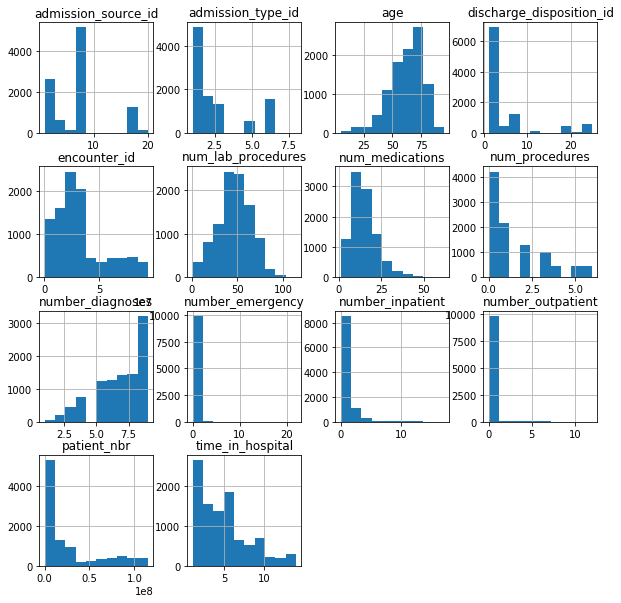

In [31]:
play = original.copy()
transf_age_inplace(play)

play.hist(figsize=(10, 10))
# plt.title('Distributions of numerical features')
plt.savefig('num-distr.png')

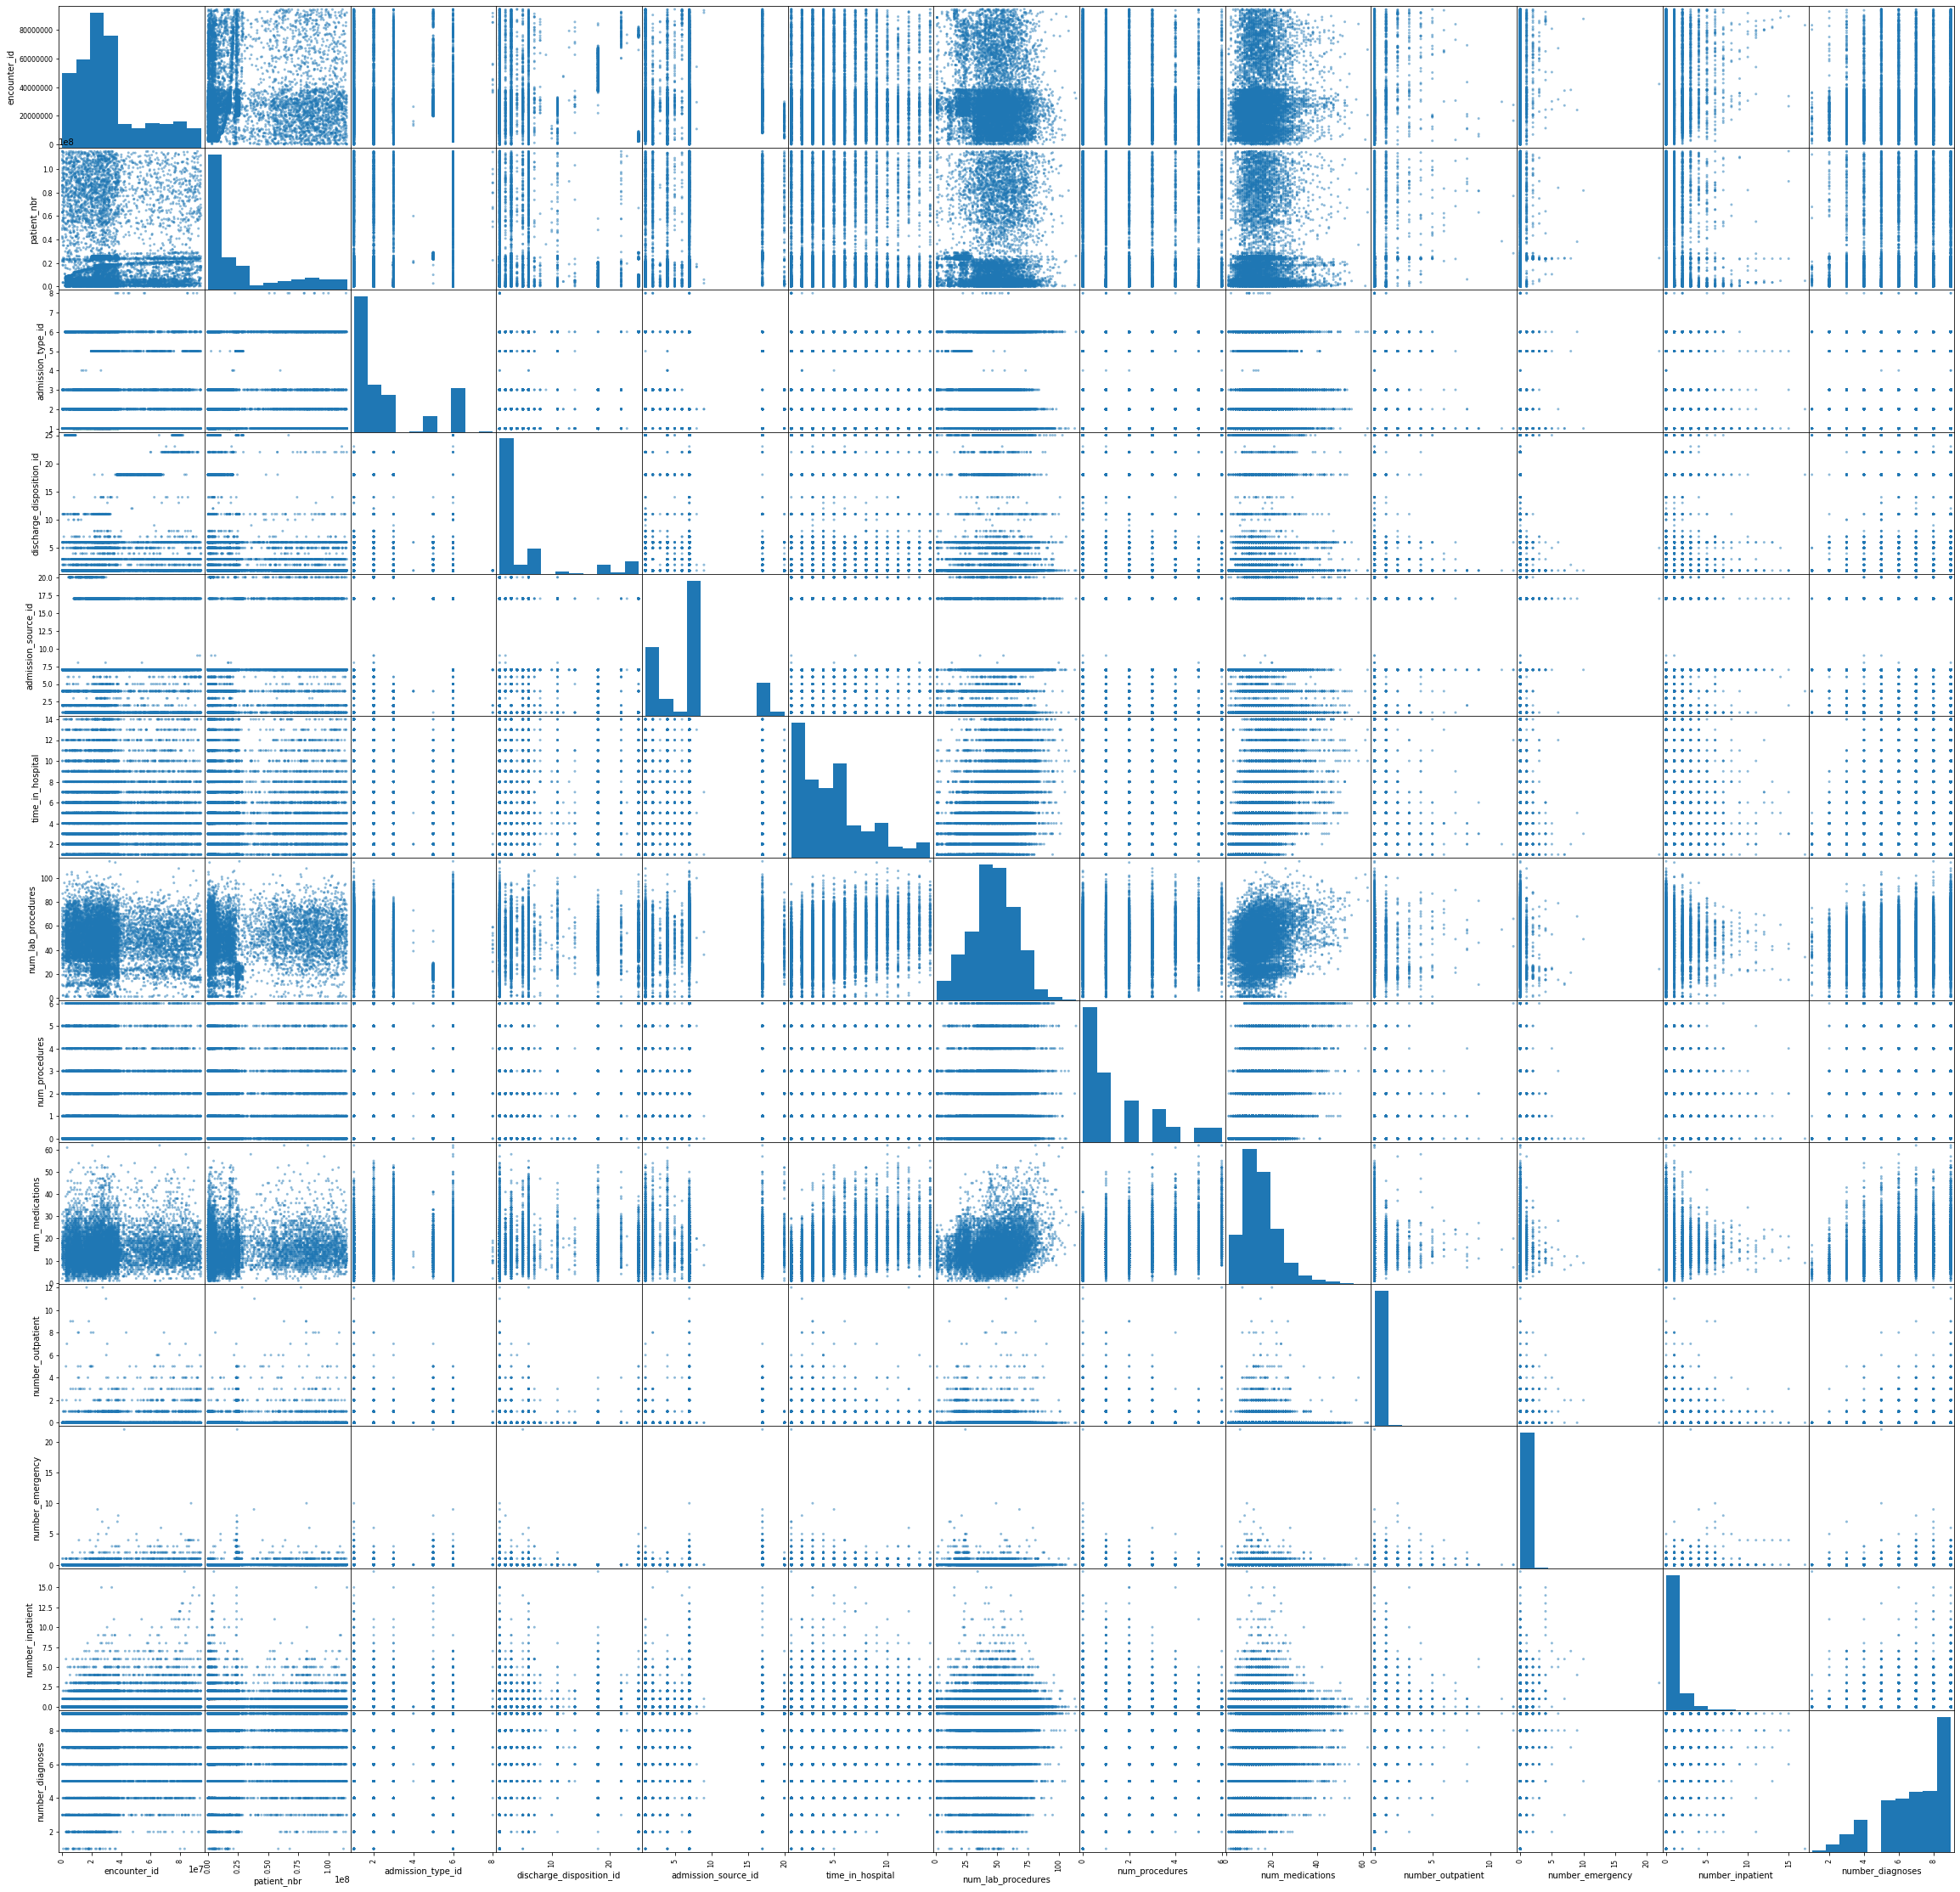

In [79]:
from pandas.plotting import scatter_matrix

scatter_matrix(original, figsize=(40, 40))
plt.savefig('full_scatter_matrix.png')

In [45]:
def analyse_cums(df, cols):
    print(len(cols))
    fig, ax = plt.subplots(len(cols), figsize=(7,5*len(cols)))
    num_idx = 0
    
    for col in cols:
        idx_sort = reversed(np.argsort(df[col].value_counts()))
        vals = df[col].value_counts()[idx_sort].values
        cumsum = np.cumsum(vals)
        fullsum = np.sum(vals)
        
        cur_axs = ax[num_idx] if len(cols) > 1 else ax
        
        cur_axs.set_title('Cumulative sum of ' + str(col) + ' values')
        cur_axs.plot(cumsum / fullsum)
        
        cur_axs.set_xlabel("Number of top category values used")
        cur_axs.set_ylabel("Proportion of the total sum")
        num_idx += 1
    
    
    return fig

1


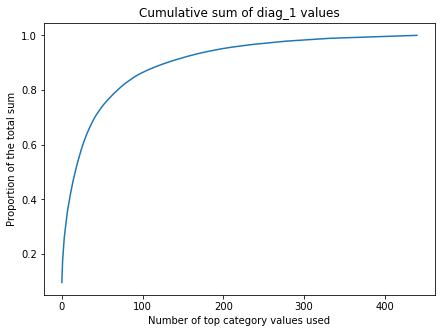

In [48]:
analyse_cums(original, ['diag_1']).savefig('cumv_diag_1.png')

1


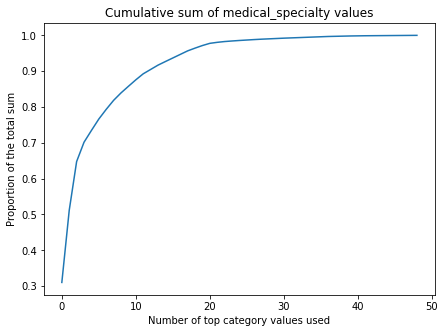

In [47]:
analyse_cums(original, ['medical_specialty']).savefig('Cumulative distributions of medspec.png')

In [56]:
df.fillna('diag_1', inplace=True)

In [71]:
def plot_distribution(df, cols):
    
    fig, ax = plt.subplots(len(cols), figsize=(7,5*len(cols)))
    num_idx = 0
    
    for col in cols:
        cur_axs = ax[num_idx] if len(cols) > 1 else ax
        
        cur_axs.hist(df[col])
        cur_axs.set_title("Distribution of " + str(col))
        cur_axs.set_xticks([])
        cur_axs.set_ylabel('Frequency')
        cur_axs.set_xlabel('Value')
        
        num_idx += 1
    
    return fig

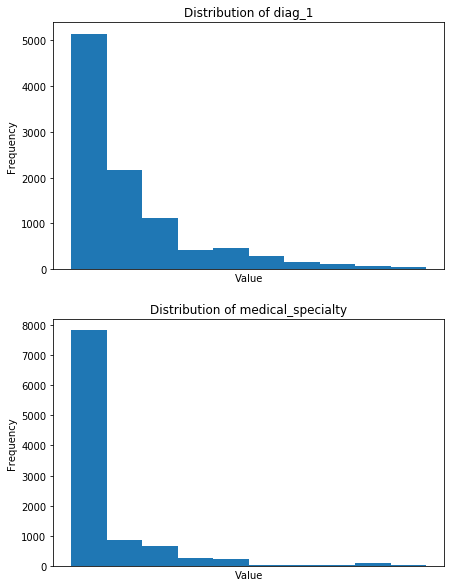

In [75]:
plot_distribution(df, ['diag_1', 'medical_specialty']).savefig('diag-med-distr.png')

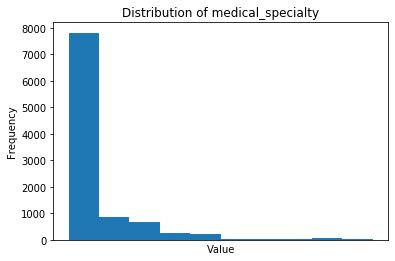

In [70]:
plot_distribution(df, 'medical_specialty').savefig('medspec-distr.png')